In [1]:


from agent.OnOff_Agent import OnOffAgent
from Logger import Logger
from environment.ContinuousEnvironment import ContinuousSimpleEnvironment

%load_ext autoreload
%autoreload 2

SELECTED ENV ACTION 16
Iteration0
SELECTED ENV ACTION 16
Iteration1000
SELECTED ENV ACTION 16
Iteration2000
SELECTED ENV ACTION 16
Iteration3000
SELECTED ENV ACTION 16
Iteration4000
SELECTED ENV ACTION 16
Iteration5000
SELECTED ENV ACTION 16
Iteration6000
SELECTED ENV ACTION 16
Iteration7000
SELECTED ENV ACTION 16
Iteration8000
SELECTED ENV ACTION 16
Iteration9000
SELECTED ENV ACTION 16
Iteration10000
SELECTED ENV ACTION 16
Iteration11000
SELECTED ENV ACTION 16
Iteration12000
SELECTED ENV ACTION 16
Iteration13000
SELECTED ENV ACTION 16
Iteration14000
SELECTED ENV ACTION 16
Iteration15000
SELECTED ENV ACTION 16
Iteration16000
SELECTED ENV ACTION 16
Iteration17000
SELECTED ENV ACTION 16
Iteration18000
SELECTED ENV ACTION 16
Iteration19000
SELECTED ENV ACTION 16
Iteration20000
SELECTED ENV ACTION 16
Iteration21000


('C:\\Users\\Harold\\Desktop\\ENAC-Semester-Project\\DIET_Controller\\logs\\simple_simulation/results/OnOff_Agent/2022_6_8/results_2022_6_8_18_11',
             Tair  Tset       PMV  Heating  Reward  Occ
 0       7.082887    16 -3.646693      0.0     1.0  0.0
 1       7.086892    16 -3.650172      0.0     1.0  0.0
 2       7.099072    16 -3.651367      0.0     1.0  0.0
 3       7.114199    16 -3.651018      0.0     1.0  0.0
 4       7.130398    16 -3.649999      0.0     1.0  0.0
 ...          ...   ...       ...      ...     ...  ...
 21739  19.755539    16 -0.544091      0.0     1.0  0.0
 21740  19.743664    16 -0.547650      0.0     1.0  0.0
 21741  19.732482    16 -0.550905      0.0     1.0  0.0
 21742  19.721914    16 -0.553870      0.0     1.0  0.0
 21743  19.711947    16 -0.556577      0.0     1.0  0.0
 
 [21744 rows x 6 columns])

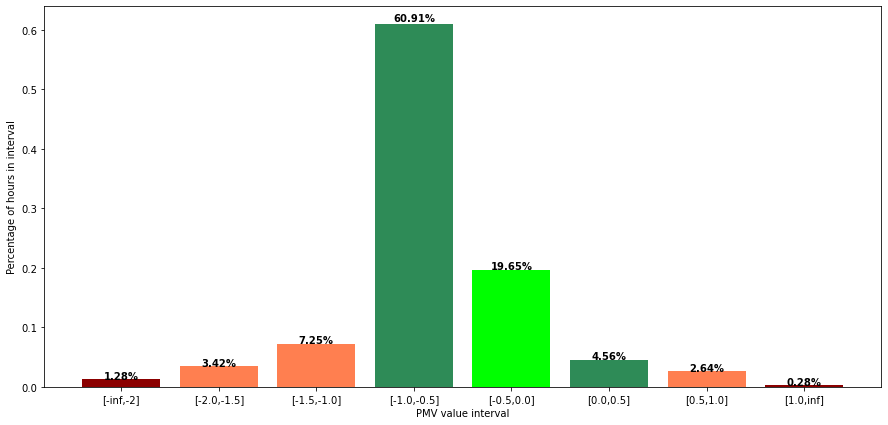

In [2]:
env = ContinuousSimpleEnvironment(param_list=['Tair', 'RH', 'Tmrt', 'Tout', 'Qheat', 'Occ'],
alpha=0.5,
beta=1,
min_temp=16,
max_temp=21,
modelname='CELLS_v1.fmu',
simulation_path=r'C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\EnergyPlus_simulations\simple_simulation',
days=151,
hours=24,
minutes=60,
seconds=60,
ep_timestep=6)


logging_path = r"C:\Users\Harold\Desktop\ENAC-Semester-Project\DIET_Controller\logs\simple_simulation"


agent = OnOffAgent(env=env)


agent.train(logging_path=logging_path, num_episodes=1, num_iterations=None, log=True)